In [ ]:
## Thư viện
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
# Khác
import warnings
warnings.filterwarnings("ignore")

#Đọc dữ liệu

In [ ]:
#Load file từ link
!gdown 1J6xHufj8BguMQYYly1a5BwO87TWyn4Qh

Downloading...
From: https://drive.google.com/uc?id=1J6xHufj8BguMQYYly1a5BwO87TWyn4Qh
To: /content/Country-data.csv
100% 9.23k/9.23k [00:00<00:00, 35.5MB/s]


In [ ]:
!gdown 12rgZlvfIIPY82XuZvq0PSmqscPd0H3Jf

Downloading...
From: https://drive.google.com/uc?id=12rgZlvfIIPY82XuZvq0PSmqscPd0H3Jf
To: /content/data-dictionary.csv
100% 753/753 [00:00<00:00, 3.73MB/s]


In [ ]:
#Đọc file
import chardet

with open('Country-data.csv', 'rb') as country:
    result = chardet.detect(country.read())

country = pd.read_csv('Country-data.csv', encoding=result['encoding'])


with open('data-dictionary.csv', 'rb') as dic:
    result = chardet.detect(dic.read())

dic = pd.read_csv('data-dictionary.csv', encoding=result['encoding'])



In [ ]:
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
dic


,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services. Given as %age o...
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age o...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


# **Tổng quan về bộ dữ liệu**

In [ ]:
# Quan sát số hàng và số cột của file country
print("Tổng số các bản ghi (các hàng) trong tập dữ liệu : {}".format(country.shape[0]))
print("Tổng số các cột (features) trong tập dữ liệu : {}".format(country.shape[1]))

Tổng số các bản ghi (các hàng) trong tập dữ liệu : 167
Tổng số các cột (features) trong tập dữ liệu : 10


In [ ]:
# Chọn các cột số (numeric)
df_numeric = country.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("Các cột có dữ liệu là số : {}".format(numeric_cols))


# Chọn các cột không phải là số (non - numeric)
df_non_numeric = country.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("Các cột có dữ liệu không phải là số : {}".format(non_numeric_cols))

Các cột có dữ liệu là số : ['child_mort' 'exports' 'health' 'imports' 'income' 'inflation'
 'life_expec' 'total_fer' 'gdpp']
Các cột có dữ liệu không phải là số : ['country']


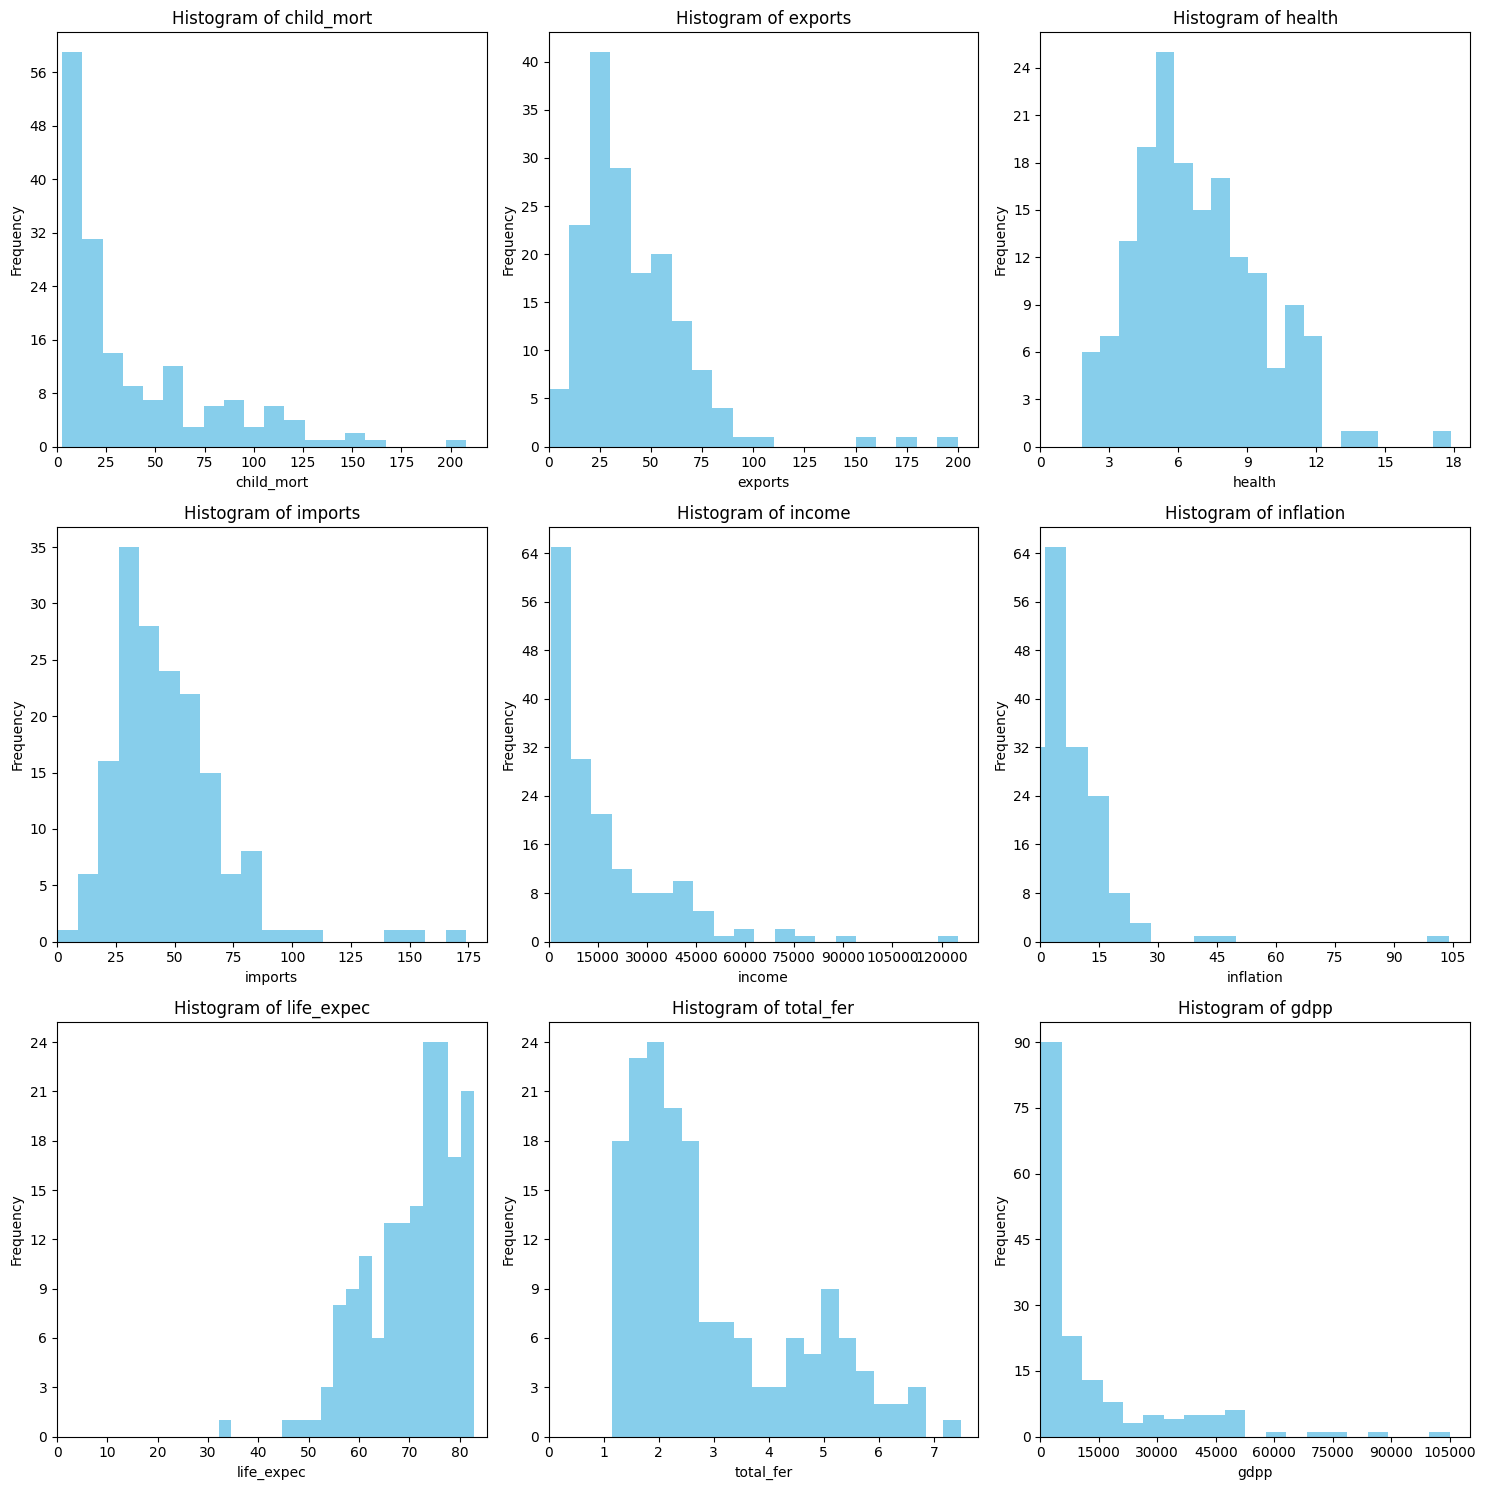

In [ ]:
from matplotlib.ticker import MaxNLocator
# Danh sách các thuộc tính số
numeric_cols = ['child_mort', 'exports', 'health', 'imports',
                'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
# Số lượng cột trong mỗi dòng
cols_per_row = 3
# Tính số lượng dòng cần tạo
num_rows = (len(numeric_cols) + cols_per_row - 1) // cols_per_row
# Vẽ biểu đồ histogram cho từng thuộc tính, chia mỗi dòng ba biểu đồ
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5*num_rows))
for i, column in enumerate(numeric_cols):
    row = i // cols_per_row
    col = i % cols_per_row
    ax = axes[row, col]
    ax.hist(country[column], bins=20, color='skyblue')
    # Xác định lại phạm vi trục x và y để trùng với gốc tọa độ (0,0)
    ax.set_xlim(left=0)  # Đặt phạm vi trục x từ 0
    ax.set_ylim(bottom=0)  # Đặt phạm vi trục y từ 0
    ax.set_title(f"Histogram of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    # Định dạng lại ticks trên trục x và trục y để chỉ hiển thị số 0 tại gốc tọa độ
    ax.xaxis.set_major_locator(MaxNLocator(nbins='auto', integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(nbins='auto', integer=True))
# Xóa các subplot còn thừa nếu có
for i in range(len(numeric_cols), num_rows * cols_per_row):
    row = i // cols_per_row
    col = i % cols_per_row
    fig.delaxes(axes[row, col])
plt.tight_layout()
plt.show()

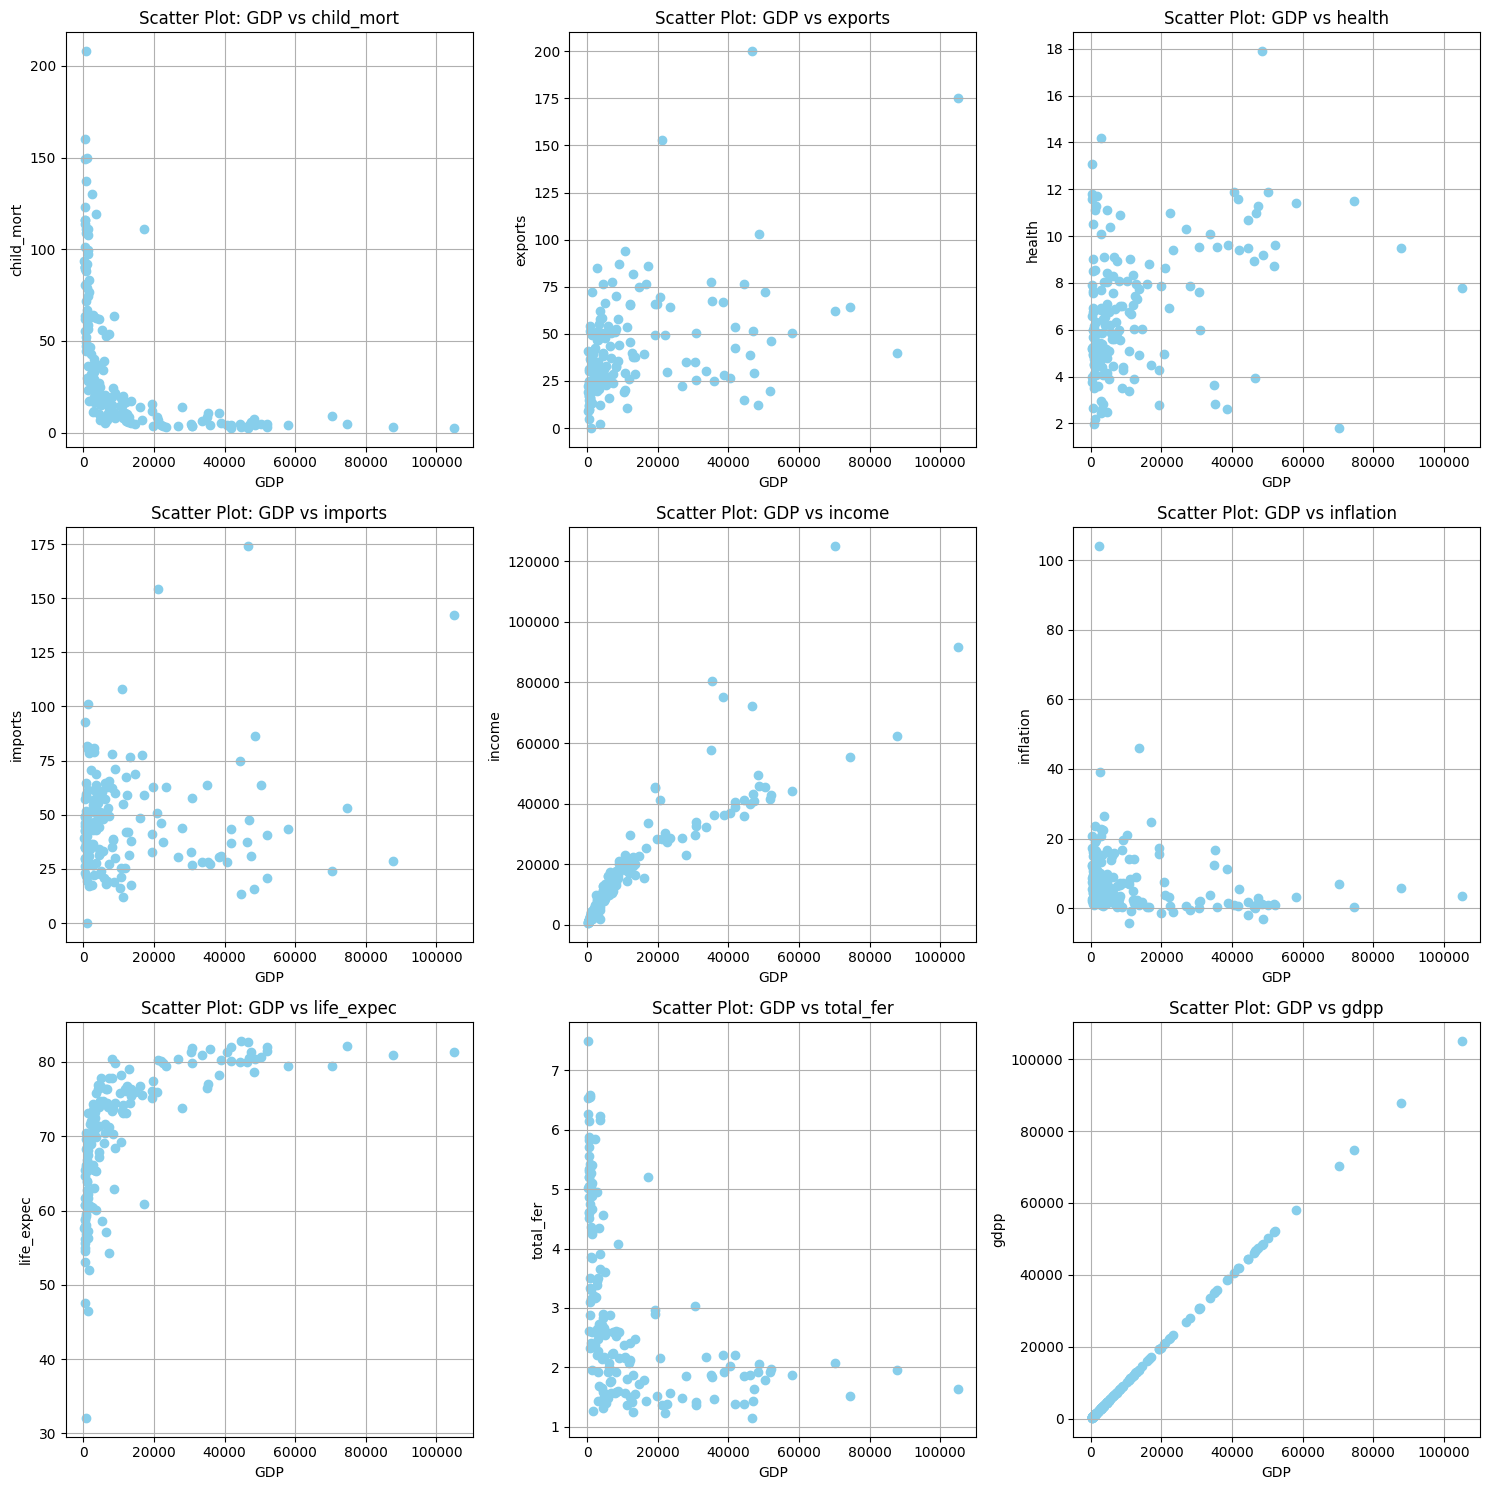

In [ ]:
# Danh sách các thuộc tính số
numeric_cols = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
# Số lượng cột trong mỗi dòng
cols_per_row = 3
# Tính số lượng dòng cần tạo
num_rows = (len(numeric_cols) + cols_per_row - 1) // cols_per_row
# Vẽ biểu đồ scatter plot giữa GDP và từng thuộc tính số, chia mỗi dòng ba biểu đồ
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5*num_rows))
for i, column in enumerate(numeric_cols):
    row = i // cols_per_row
    col = i % cols_per_row
    ax = axes[row, col]
    ax.scatter(country['gdpp'], country[column], color='skyblue')
    ax.set_title(f"Scatter Plot: GDP vs {column}")
    ax.set_xlabel('GDP')
    ax.set_ylabel(column)
    ax.grid(True)
# Xóa các subplot còn thừa nếu có
for i in range(len(numeric_cols), num_rows * cols_per_row):
    row = i // cols_per_row
    col = i % cols_per_row
    fig.delaxes(axes[row, col])
plt.tight_layout()
plt.show()

#Tiền xử lý

In [ ]:
#Theo như mô tả từ bộ dữ liệu 'data-dictionary.csv', các cột export,health,imoprt ở dạng %.

country['exports'] = country['exports']*country['gdpp']/100
country['health'] = country['health']*country['gdpp']/100
country['imports'] =country['imports']*country['gdpp']/100

country['exports'].apply(lambda x:round(x,2))
country['health'].apply(lambda x:round(x,2))
country['imports'].apply(lambda x:round(x,2))

country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [ ]:
country['exports'].describe()

count       167.000000
mean       7420.618847
std       17973.885795
min           1.076920
25%         447.140000
50%        1777.440000
75%        7278.000000
max      183750.000000
Name: exports, dtype: float64

In [ ]:
country['health'].describe()

count     167.000000
mean     1056.733204
std      1801.408906
min        12.821200
25%        78.535500
50%       321.886000
75%       976.940000
max      8663.600000
Name: health, dtype: float64

In [ ]:
country['imports'].describe()

count       167.000000
mean       6588.352108
std       14710.810418
min           0.651092
25%         640.215000
50%        2045.580000
75%        7719.600000
max      149100.000000
Name: imports, dtype: float64

In [ ]:
print("\nBỘ DỮ LIỆU COUNTRY TRƯỚC KHI XỬ LÝ MISSING VALUES")
print(country.isnull().sum())
null_count = country.isnull().sum().sum()
print("Số lượng giá trị Null trong Movies:", null_count)


BỘ DỮ LIỆU COUNTRY TRƯỚC KHI XỬ LÝ MISSING VALUES
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64
Số lượng giá trị Null trong Movies: 0


Trong bộ dữ liệu không có missing value

In [ ]:
print("Số giá trị 0 trong cột:")
(country[country == 0]).sum()

Số giá trị 0 trong cột:


country         0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: object

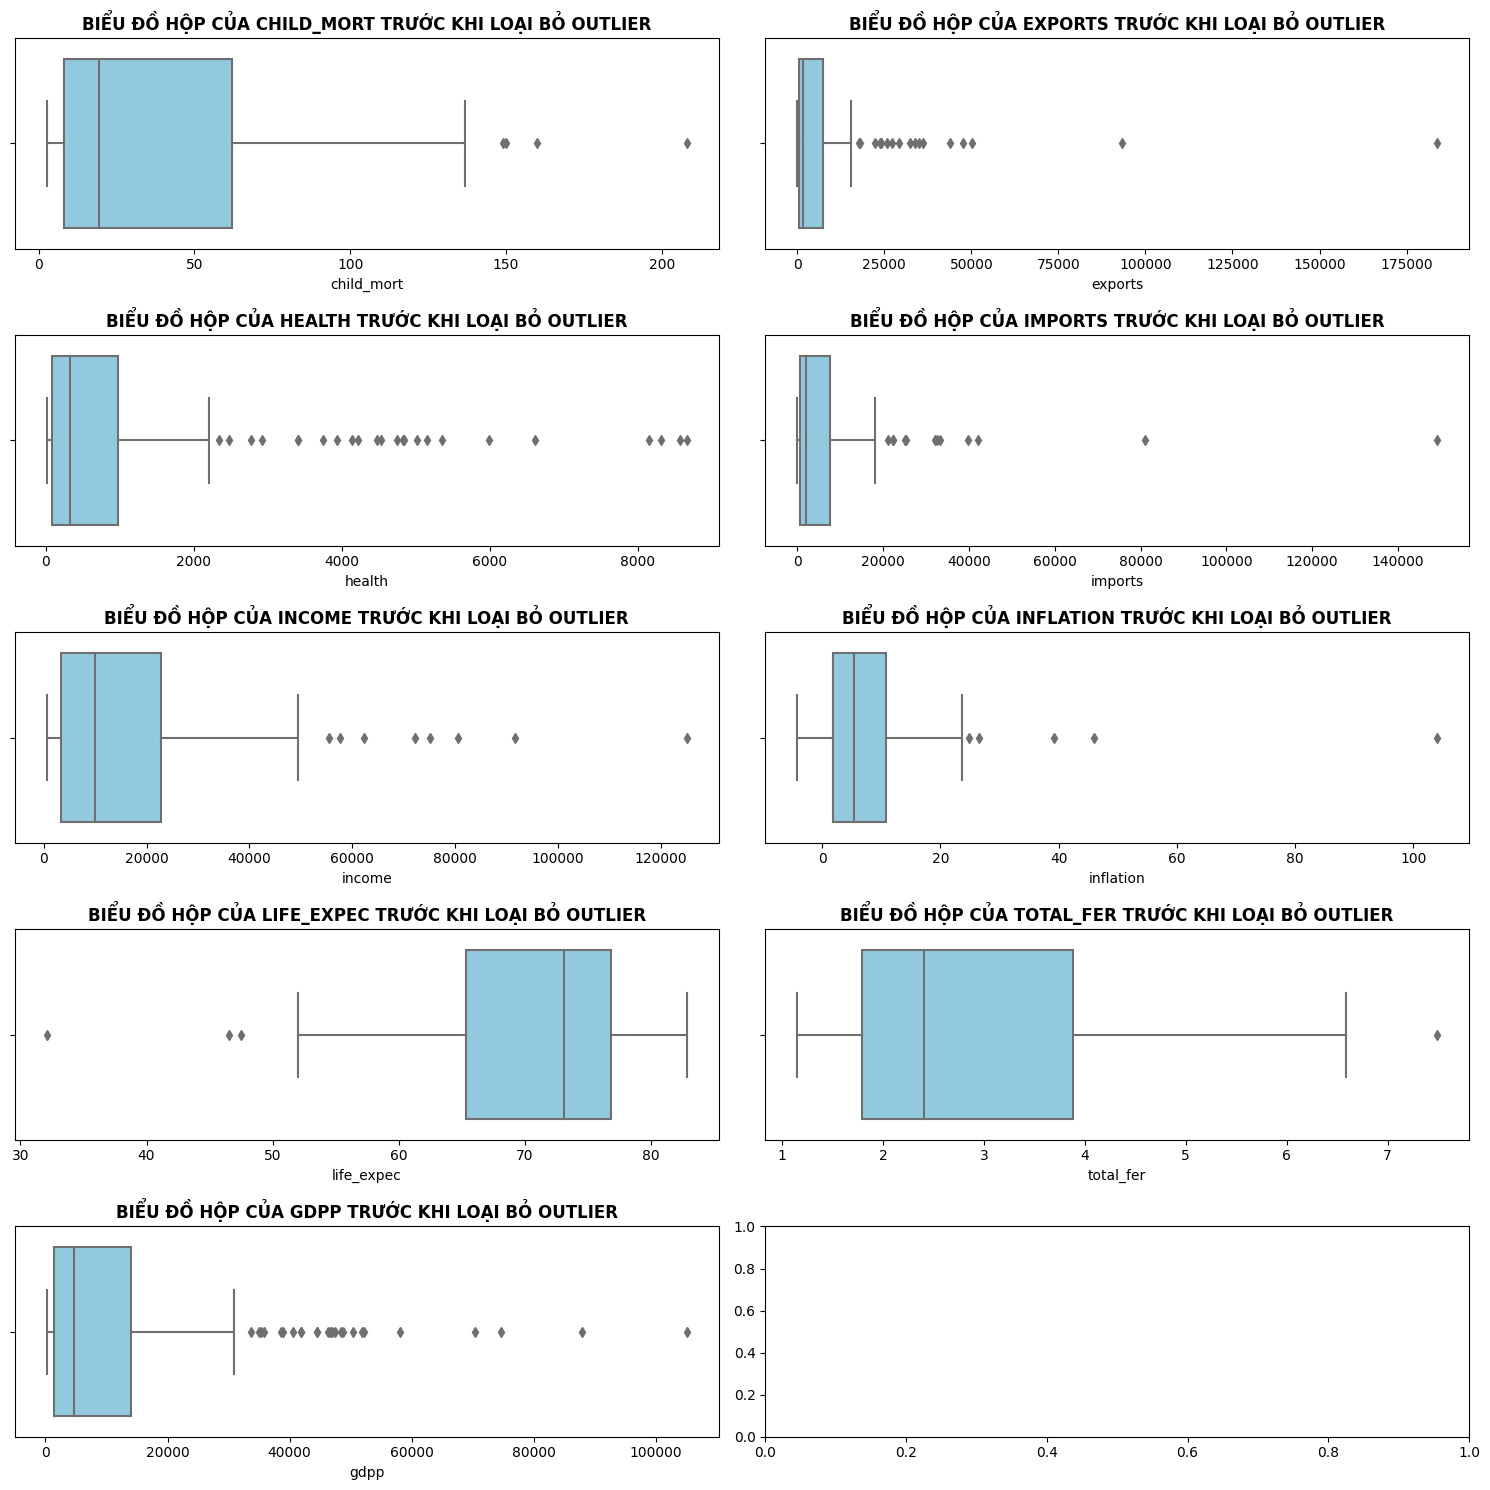

In [ ]:
# Kiểm tra dữ liệu nhiễu thông qua biểu đồ dạng Boxplot

# Lọc các biến định tính
numerical_country = country.select_dtypes(include=['int64', 'float64'])

# Tạo lưới subplot
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 3 * 5))

# Lặp qua từng cột và vẽ boxplot trong từng ô subplot
for i, column in enumerate(numerical_country.columns):
    row_index = i // 2  # Dòng của ô subplot
    col_index = i % 2   # Cột của ô subplot
    sns.boxplot(x=numerical_country[column], ax=axes[row_index, col_index], color='skyblue')
    axes[row_index, col_index].set_title(f'BIỂU ĐỒ HỘP CỦA {column.upper()} TRƯỚC KHI LOẠI BỎ OUTLIER', fontsize=12, fontweight='bold')

# Tinh chỉnh layout
plt.tight_layout()
plt.show()


In [ ]:
# Xử lý outlier bằng phương pháp IQR

# Lưu số dòng ban đầu của DataFrame country
initial_rows = len(country)

# Lặp qua từng cột trong numerical_country
for column in numerical_country:
    # Tính Q1 và Q3
    Q1 = country[column].quantile(0.25)
    Q3 = country[column].quantile(0.75)
    # Tính IQR
    IQR = Q3 - Q1
    # Tính giới hạn dưới và giới hạn trên
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Đếm số lượng outlier trước khi loại bỏ
    outliers_before_removal = ((country[column] < lower_bound) | (country[column] > upper_bound)).sum()
    # Loại bỏ giá trị ngoài IQR trong DataFrame country
    country = country[~((country[column] < lower_bound) | (country[column] > upper_bound))]
    # Đếm số lượng outlier sau khi loại bỏ
    outliers_after_removal = ((country[column] < lower_bound) | (country[column] > upper_bound)).sum()
    # Hiển thị thông tin về số lượng outlier đã bị loại bỏ cho cột hiện tại
    print(f"Số outlier đã bị loại bỏ trong cột '{column}': {outliers_before_removal} trước và {outliers_after_removal} sau")

# Hiển thị số dòng đã được xử lý
rows_removed = initial_rows - len(country)
percentage_removed = (rows_removed / initial_rows) * 100
print(f"Tổng số dòng đã bị loại bỏ: {rows_removed} trên tổng số {initial_rows} ({percentage_removed:.2f}%)")

Số outlier đã bị loại bỏ trong cột 'child_mort': 4 trước và 0 sau
Số outlier đã bị loại bỏ trong cột 'exports': 16 trước và 0 sau
Số outlier đã bị loại bỏ trong cột 'health': 17 trước và 0 sau
Số outlier đã bị loại bỏ trong cột 'imports': 12 trước và 0 sau
Số outlier đã bị loại bỏ trong cột 'income': 2 trước và 0 sau
Số outlier đã bị loại bỏ trong cột 'inflation': 4 trước và 0 sau
Số outlier đã bị loại bỏ trong cột 'life_expec': 0 trước và 0 sau
Số outlier đã bị loại bỏ trong cột 'total_fer': 0 trước và 0 sau
Số outlier đã bị loại bỏ trong cột 'gdpp': 1 trước và 0 sau
Tổng số dòng đã bị loại bỏ: 56 trên tổng số 167 (33.53%)


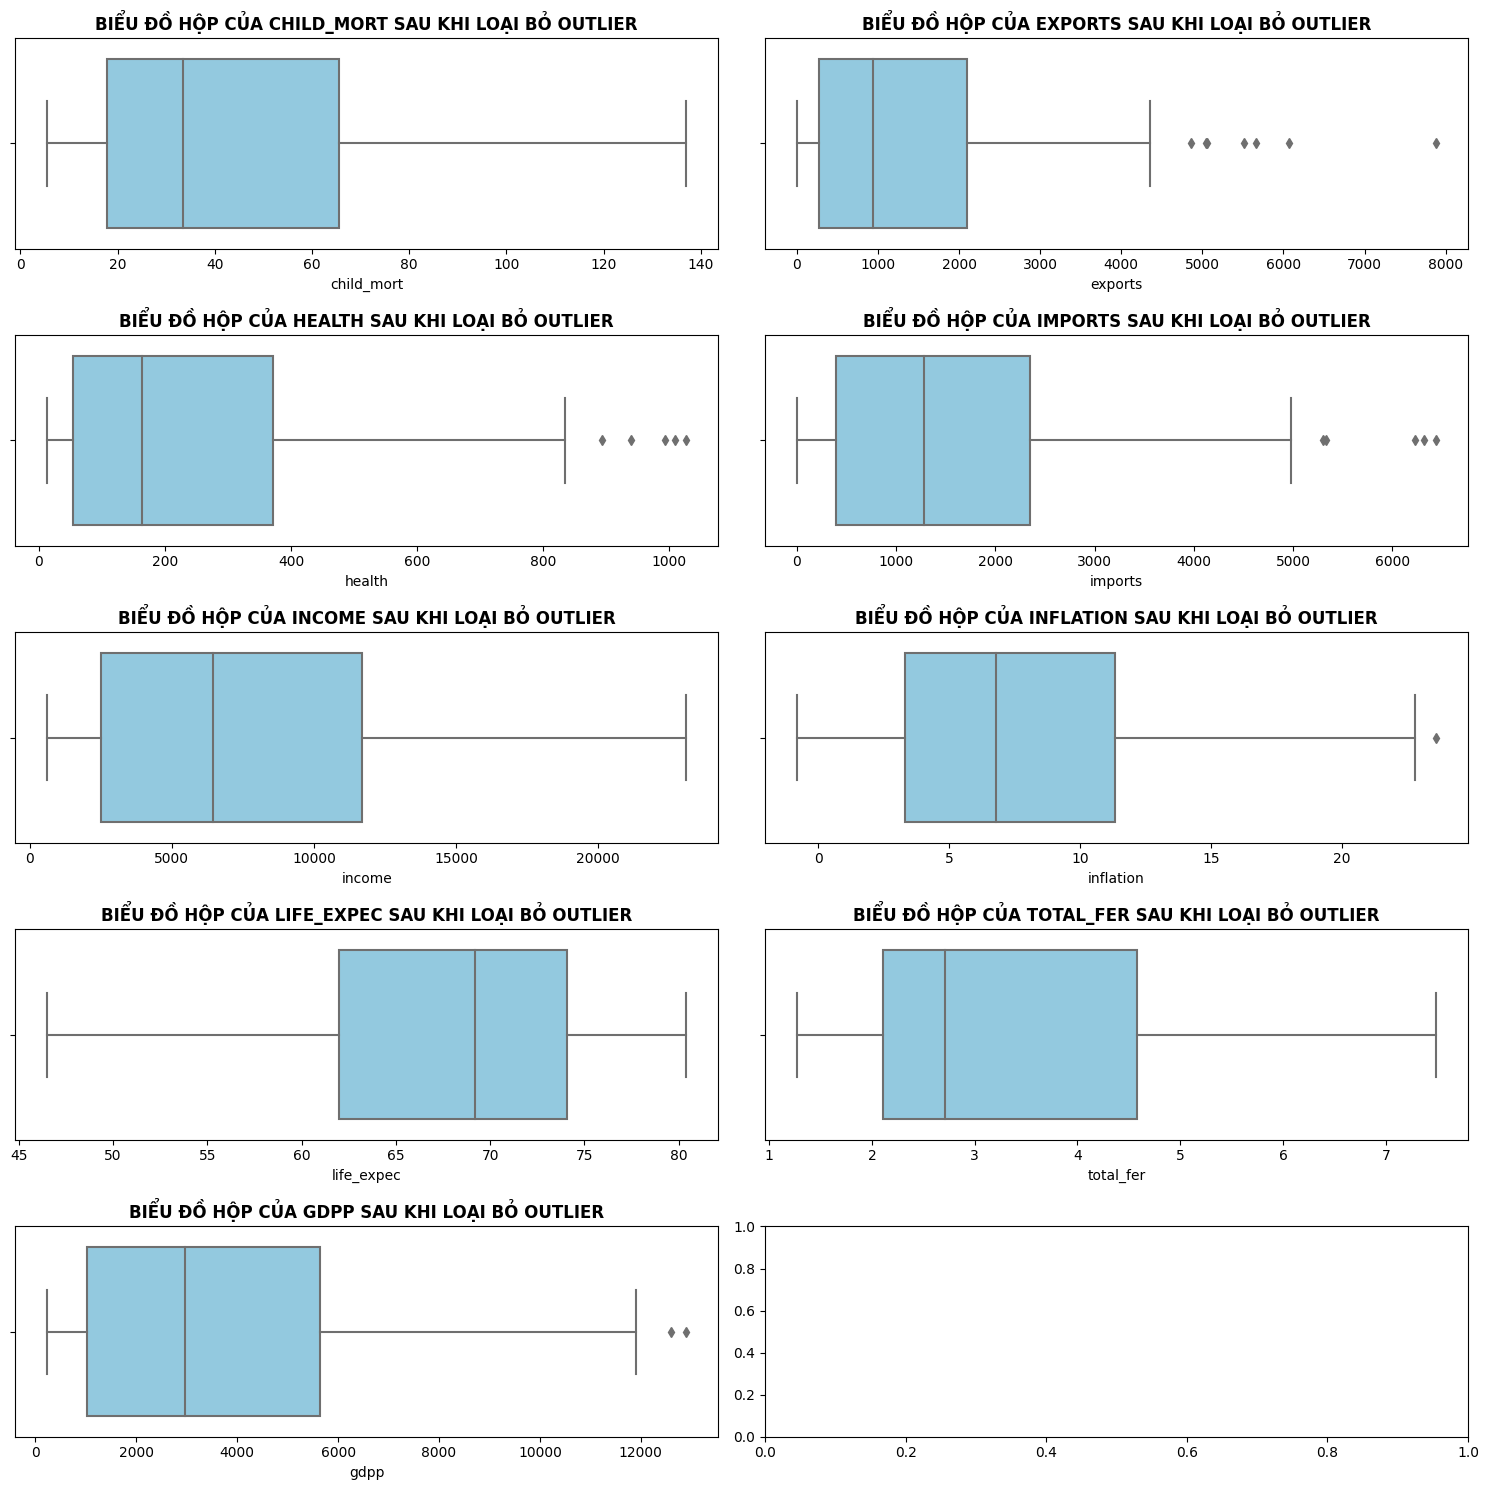

In [ ]:
# Tạo lưới subplot
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 3 * 5))

# Lặp qua từng cột và vẽ boxplot trong từng ô subplot
for i, column in enumerate(numerical_country):
    row_index = i // 2  # Dòng của ô subplot
    col_index = i % 2   # Cột của ô subplot

    sns.boxplot(x=country[column], ax=axes[row_index, col_index], color='skyblue')
    axes[row_index, col_index].set_title(f'BIỂU ĐỒ HỘP CỦA {column.upper()} SAU KHI LOẠI BỎ OUTLIER', fontsize=12, fontweight='bold')

# Tinh chỉnh layout
plt.tight_layout()
plt.show()

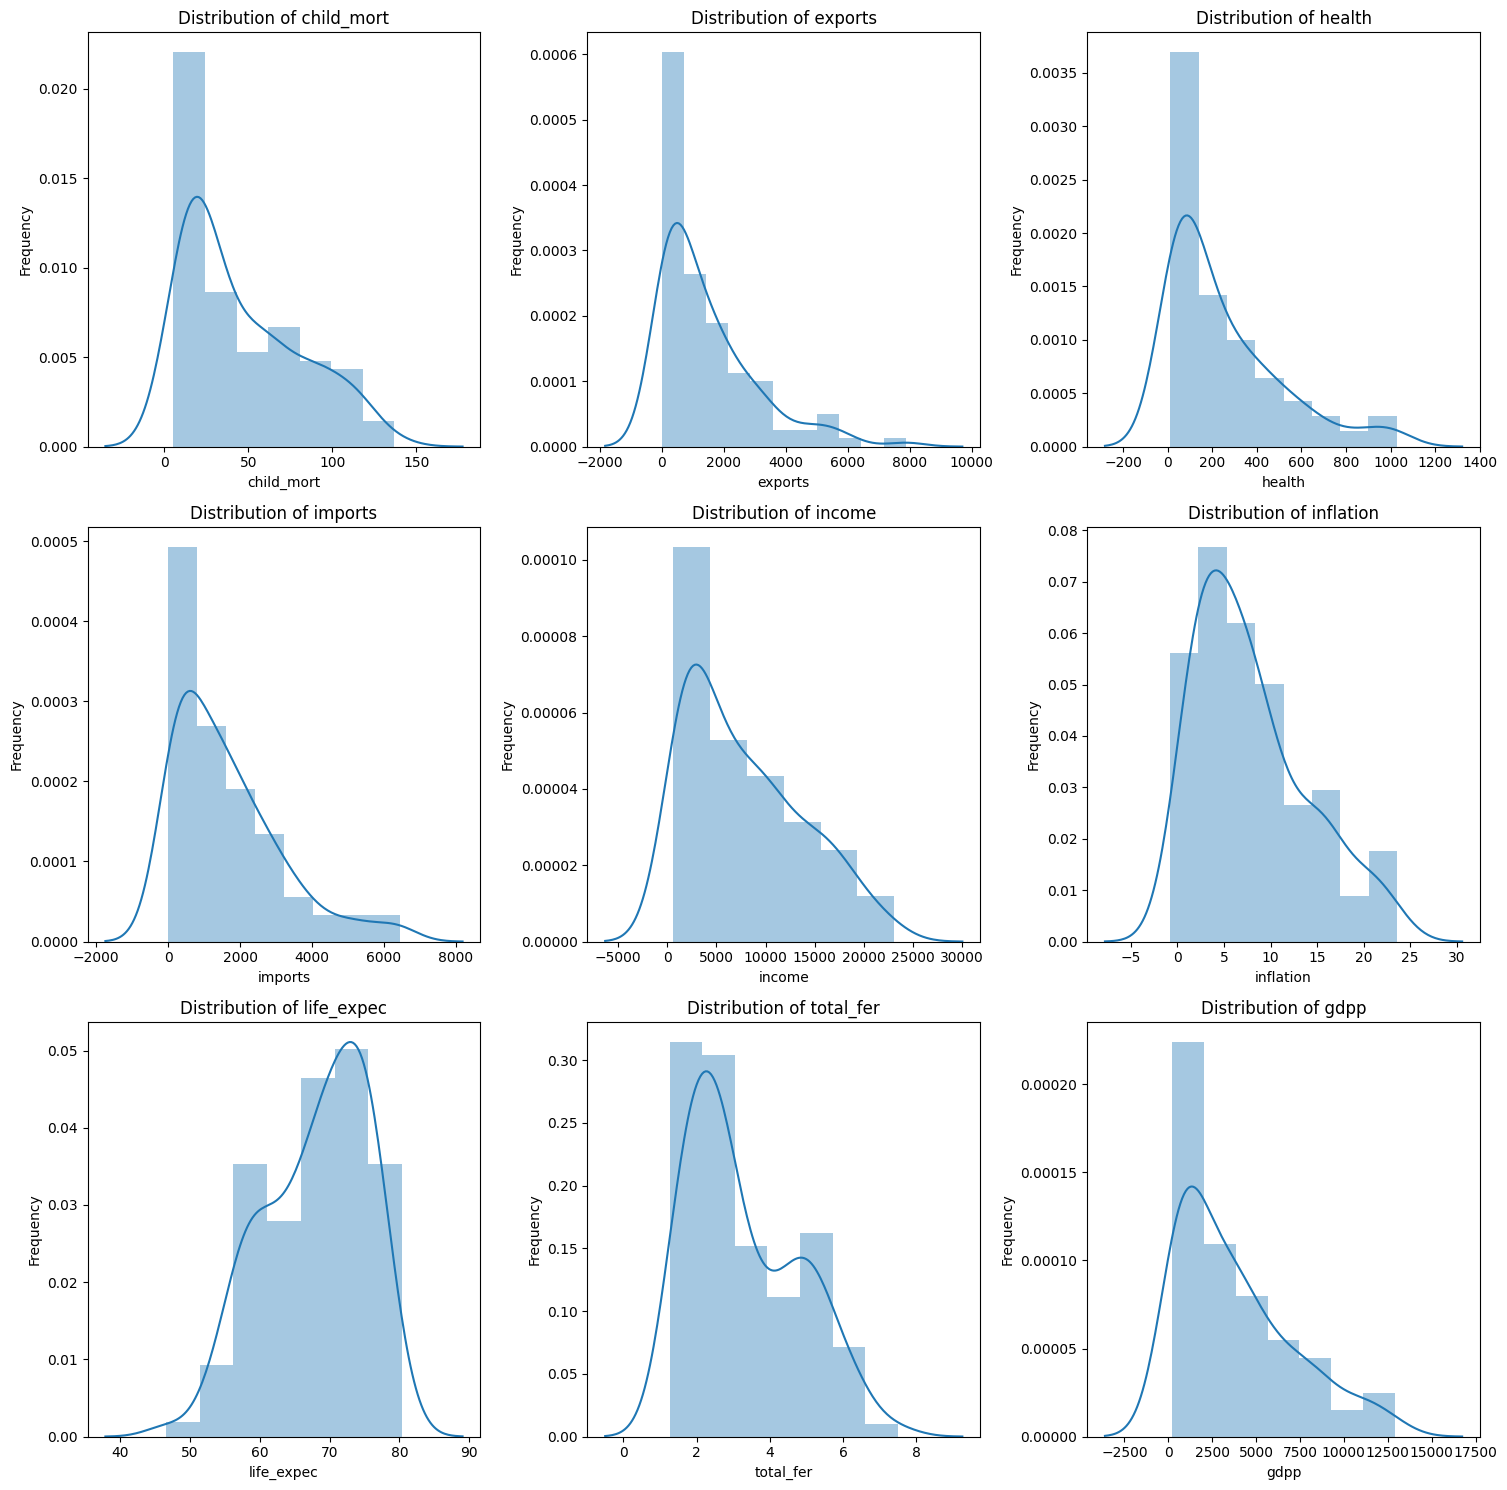

In [ ]:
data_numeric = ['child_mort', 'exports', 'health', 'imports',
                'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(15, 15))
for i, column in enumerate(data_numeric):
    plt.subplot(3, 3, i + 1)
    sns.distplot(country[column], kde=True, hist=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()